## Cross Validation 
### Evaluation Model Performance
#### KFold Cross Validation
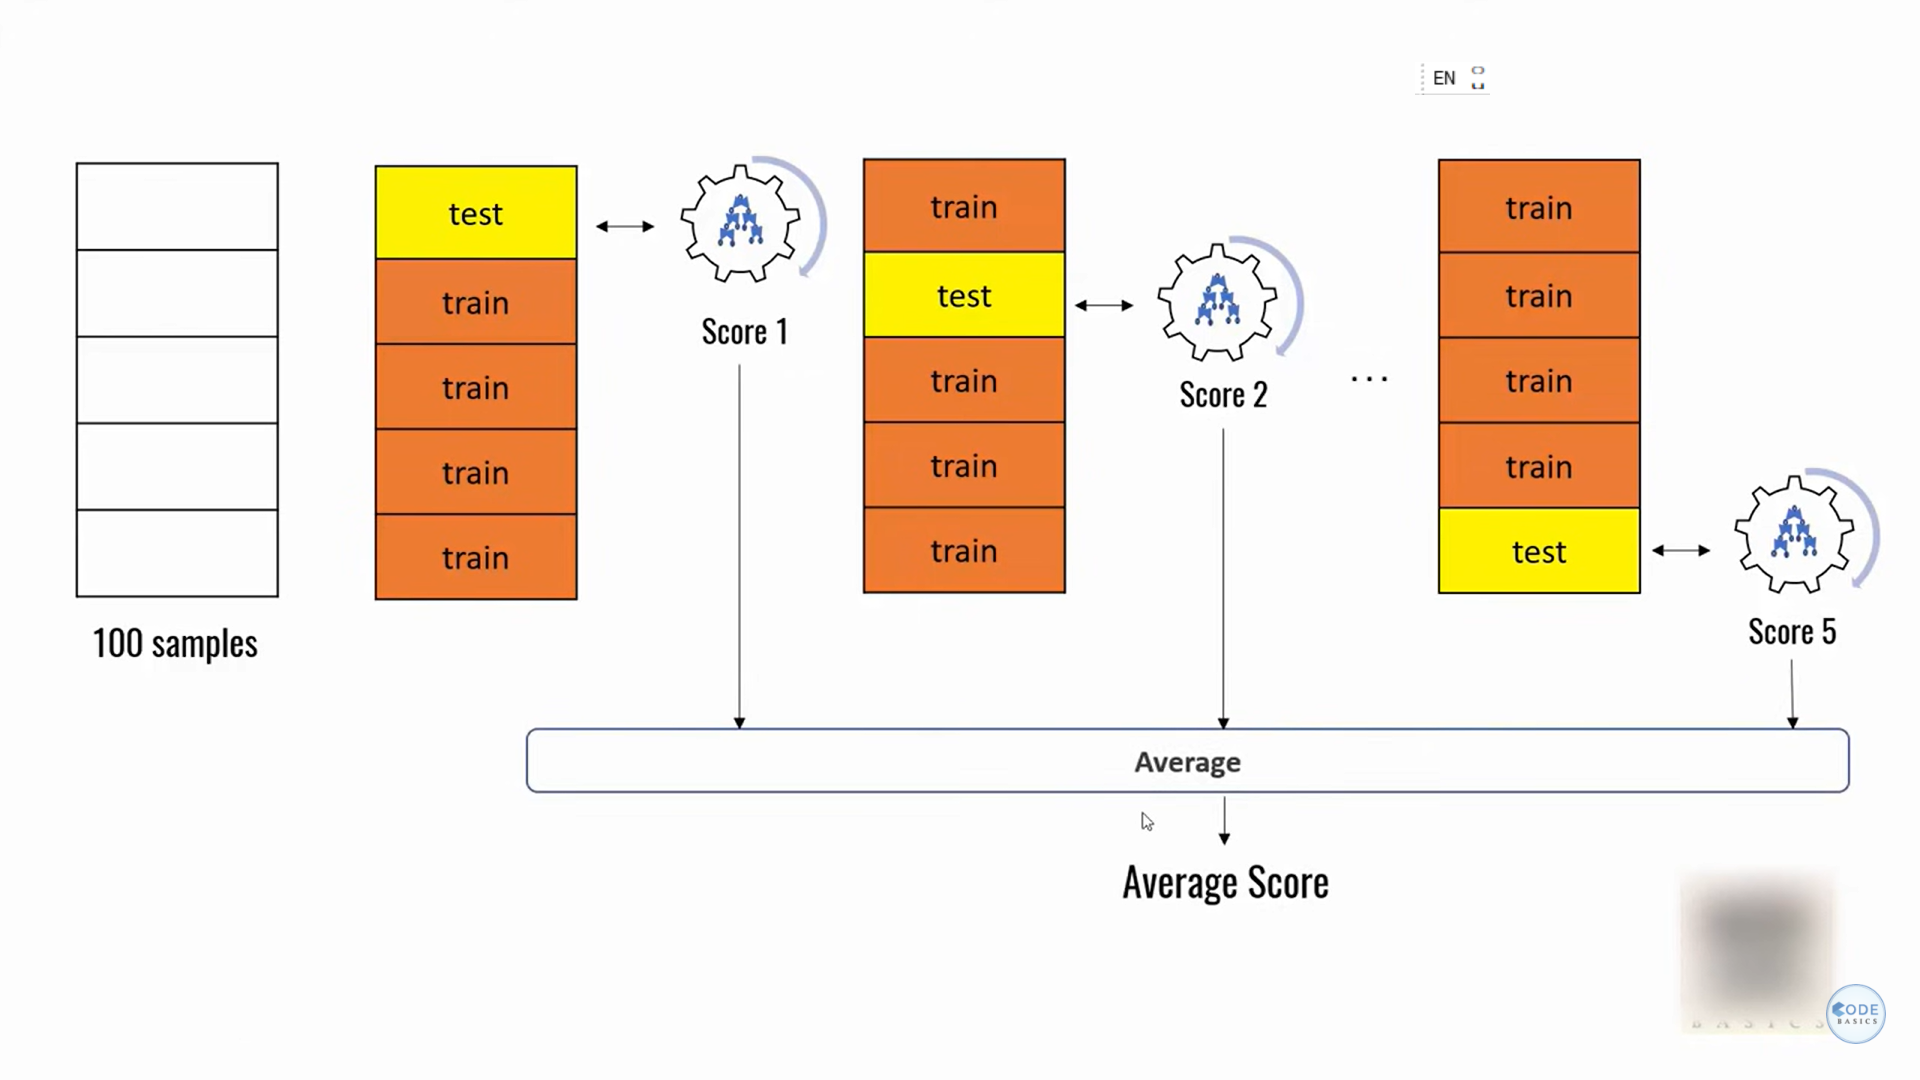 

In [1]:
from string import digits
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

#### Prepare Data

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=111)

#### Logistic Regression

In [3]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

d:\Users\Sean\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9592592592592593

#### SVM

In [4]:
svm = SVC()
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.9888888888888889

#### RandomForest

In [5]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.975925925925926

#### K Fold Validation

In [6]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [7]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index) 

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [8]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [9]:
get_score(LogisticRegression(), X_train, X_test, y_train, y_test)

d:\Users\Sean\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9592592592592593

In [10]:
get_score(RandomForestClassifier(), X_train, X_test, y_train, y_test)

0.975925925925926

In [11]:
get_score(SVC(), X_train, X_test, y_train, y_test)

0.9888888888888889

In [12]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

In [13]:
# cross_val_score() function replaces this entire code!!!!
lr_scores = []
svm_scores = []
rf_scores = []

for train_index, test_index in folds.split(digits.data, digits.target):
    
    X_train, X_test = digits.data[train_index], digits.data[test_index]
    y_train, y_test = digits.target[train_index], digits.target[test_index]
    
    lr_scores.append(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))
    svm_scores.append(get_score(SVC(), X_train, X_test, y_train, y_test))
    rf_scores.append(get_score(RandomForestClassifier(), X_train, X_test, y_train, y_test))

d:\Users\Sean\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Users\Sean\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

In [14]:
lr_scores

[0.9215358931552587, 0.9415692821368948, 0.9165275459098498]

In [15]:
svm_scores

[0.9649415692821369, 0.9799666110183639, 0.9649415692821369]

In [16]:
rf_scores

[0.9398998330550918, 0.9682804674457429, 0.9248747913188647]

#### cross_val_score function


In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
cross_val_score(LogisticRegression(), digits.data, digits.target, cv=3)

d:\Users\Sean\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Users\Sean\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

array([0.92153589, 0.94156928, 0.91652755])

In [19]:
cross_val_score(SVC(), digits.data, digits.target, cv=3)

array([0.96494157, 0.97996661, 0.96494157])

In [20]:
cross_val_score(RandomForestClassifier(), digits.data, digits.target, cv=3)

array([0.93656093, 0.95158598, 0.92988314])

#### Parameter tunning using k fold cross validation


In [21]:
score5 = cross_val_score(RandomForestClassifier(n_estimators=5), digits.data, digits.target, cv=5)
np.average(score5)

np.float64(0.8720519962859796)

In [22]:
score15 = cross_val_score(RandomForestClassifier(n_estimators=15), digits.data, digits.target, cv=5)
np.average(score15)

np.float64(0.9048777468276075)

In [23]:
score50 = cross_val_score(RandomForestClassifier(n_estimators=50), digits.data, digits.target, cv=5)
np.average(score50)

np.float64(0.9399040544722996)